# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

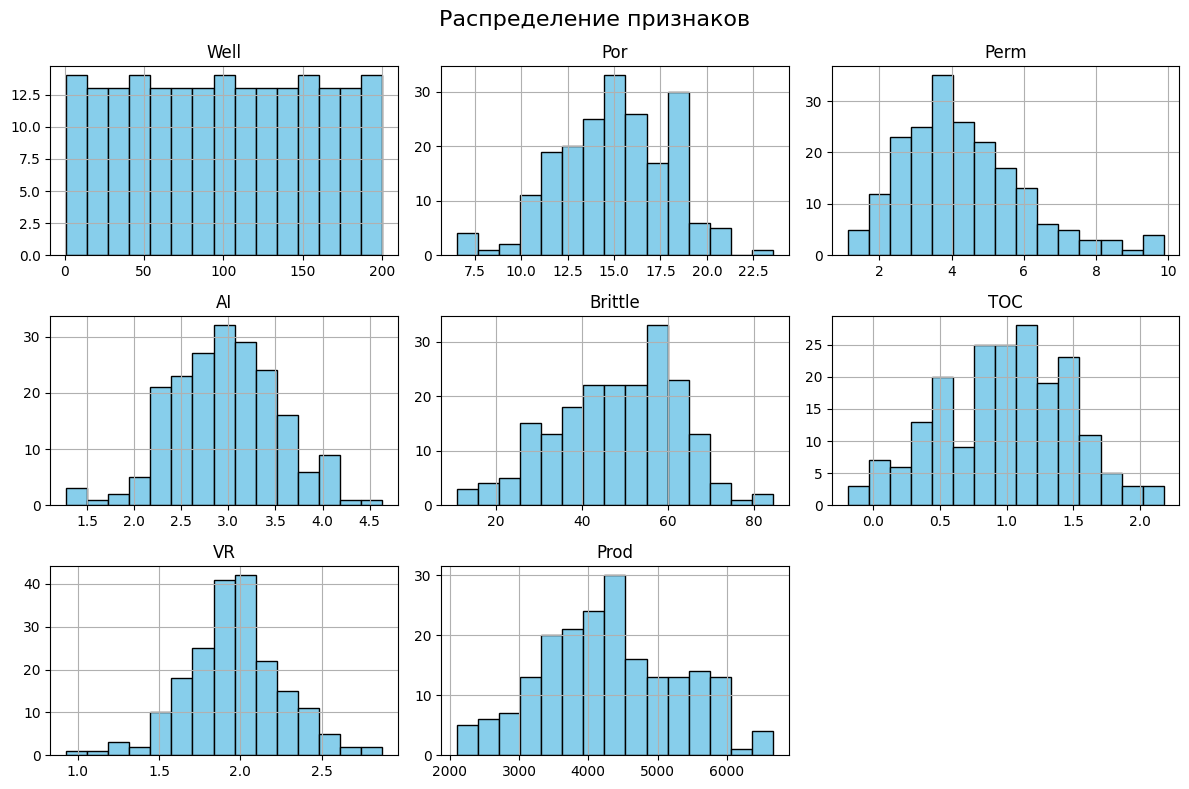

In [3]:
# Ваш код здесь
data.hist(figsize=(12, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Распределение признаков', fontsize=16)
plt.tight_layout()
plt.show()

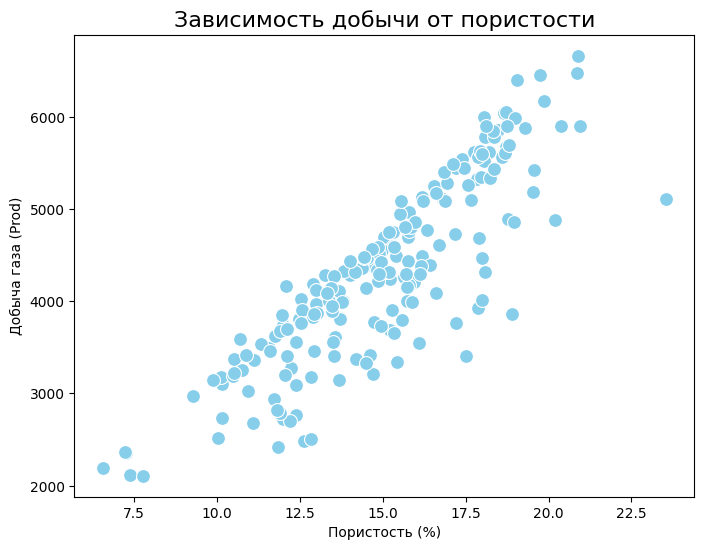

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Por', y='Prod', s=100, color='skyblue')
plt.title('Зависимость добычи от пористости', fontsize=16)
plt.xlabel('Пористость (%)')
plt.ylabel('Добыча газа (Prod)')
plt.show()

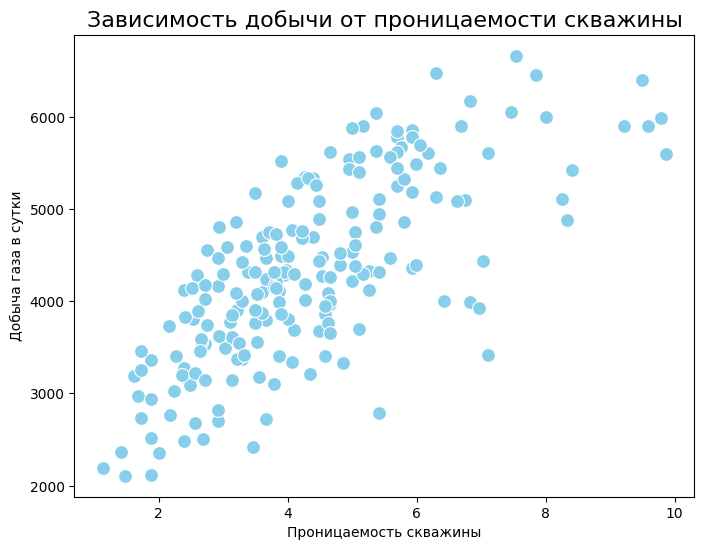

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Perm', y='Prod', s=100, color='skyblue')
plt.title('Зависимость добычи от проницаемости скважины', fontsize=16)
plt.xlabel('Проницаемость скважины')
plt.ylabel('Добыча газа в сутки')
plt.show()

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

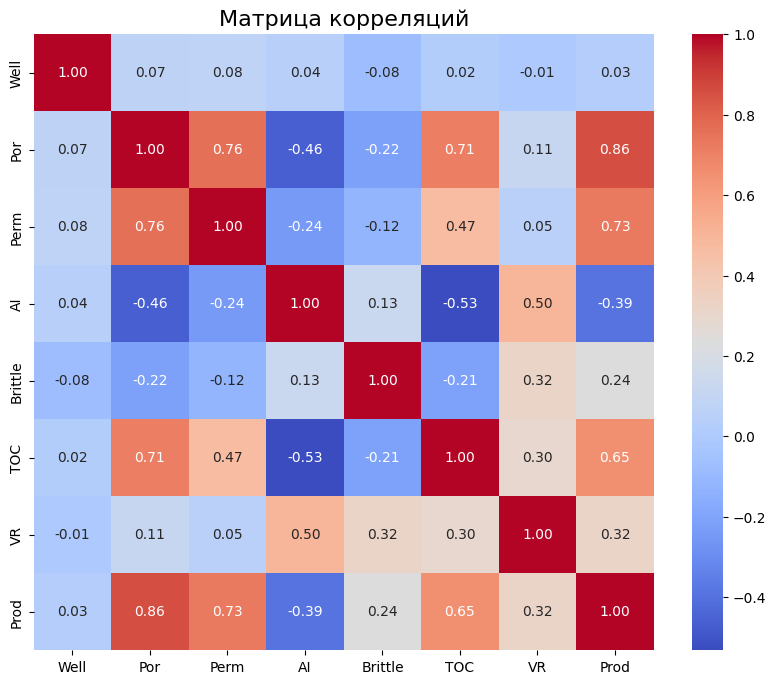

Ранг матрицы корреляций: 8
Определитель матрицы корреляций: 0.000730


In [7]:
# Ваш код здесь
# Посчитаем кореляционную матрицу
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций', fontsize=16)
plt.show()

# Посчитаем ранг и определитель
matrix_rank = np.linalg.matrix_rank(correlation_matrix)
matrix_determinant = np.linalg.det(correlation_matrix)

# Вывод результата
print(f'Ранг матрицы корреляций: {matrix_rank}')
print(f'Определитель матрицы корреляций: {matrix_determinant:.6f}')

> *Ваши выводы здесь*

1. Наибольшую корреляцию с целевой переменной имеют столбцы Por, Perm и TOC.
2. Корреляционная матрица является плохо обусловленной, т.к. её определитель равен 0.00073, что очень близко к нулю. Это указывает на потенциальные численные проблемы при работе с такой матрицей.
3. В данных отстуствует коллинеарность и мультиколлинеарность.
4. Модель классической линейной регрессии применима, но необходимо провести очистку данных. 

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [8]:
# Ваш код здесь
# Создаем матрицы наблюдений (X) и вектор правильных ответов (y)
X = np.column_stack((np.ones(data.shape[0]), data[['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']]))
y = data['Prod'].values

# По методу наименьших квадратов строим модель линейной регрессии
w_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# Вывод результата (округлим до целого)
print('Оценки коэффициентов модели линейной регрессии (округленные до целого):')
print(np.round(w_hat, 0))

Оценки коэффициентов модели линейной регрессии (округленные до целого):
[-1232.     0.   230.   116.  -365.    25.   -78.   785.]


> *Ваши выводы здесь*

Модель выявляет информативные признаки, такие как Por, Perm, AI, Brittle, TOC и VR, с разным уровнем влияния на целевую переменную. Признак Well можно считать неинформативным, и можно его исключить, модель от этого не изменится.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [11]:
# Ваш код здесь
# Задание 'а'
new_data = {
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
}
new_data_array = np.array([1, *new_data.values()])  # Добавляем единицу для интерцепта

# Прогноз выработки для новой скважины
new_prod_predict = new_data_array @ w_hat

# Реальная выработка для новой скважины
new_prod_real = 4748.315024

# Вывод прогноза и абсолютной ошибки
print(f'Прогнозируемая выработка для новой скважины: {new_prod_predict}')
print(f'Абсолютная ошибка прогноза равна: {abs(new_prod_real - new_prod_predict)}')

# Задание 'б'

# Прогноз выработки для всех скважин из обучающего набора данных
prediction = X @ w_hat

# Расчет метрик
mae = np.abs(y - prediction).mean()
mse = ((y - prediction) ** 2).mean()

# Вывод результатов
print(f'\nСреднее абсолютное отклонение (MAE) реальных данных от прогноза = {mae}')
print(f'Среднее квадратическое отклонение (MSE) реальных данных от прогноза = {mse}')

Прогнозируемая выработка для новой скважины: 4723.06405370719
Абсолютная ошибка прогноза равна: 25.250970292810052

Среднее абсолютное отклонение (MAE) реальных данных от прогноза = 153.62297086558007
Среднее квадратическое отклонение (MSE) реальных данных от прогноза = 39315.04014026637


> *Ваши выводы здесь*

Модель показала хороший результат для новой скважины, предсказав выработку с абсолютной ошибкой в 25.55 ед. (0.54%). Среднее абсолютное отклонение составляет 153.62 ед., что указывает на приемлемую точность в целом, однако высокое среднее квадратическое отклонение (39315.04) может быть связано с наличием выбросов. Считаю что для улучшения модели стоит рассмотреть дополнительные признаки и устранить выбросы.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [12]:
# Ваш код здесь
coefficients = pd.Series(w_hat, index=['Intercept', 'Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR'])
print('Коэффициенты модели линейной регрессии:')
print(coefficients)

# Вычисляем коэф. корреляции
correlations = data.corr()['Prod']
print('\nКоэффициенты корреляции между целевым признаком и факторами:')
print(correlations)

# Сравниваем коэффициенты корреляции и коэффициенты модели
comparison = pd.DataFrame({
    'Coefficient': coefficients,
    'Correlation': correlations
}).drop('Intercept')

comparison['Sign Match'] = np.sign(comparison['Coefficient']) == np.sign(comparison['Correlation'])
print('\nСравнение знаков коэффициентов корреляции и коэффициентов модели:')
print(comparison)

# Проводим анализ противоречий
discrepancies = comparison[comparison['Sign Match'] == False]
print('\nФакторы, при которых знаки коэффициентов противоречат знакам корреляций:')
print(discrepancies)


Коэффициенты модели линейной регрессии:
Intercept   -1232.308030
Well            0.050700
Por           230.179140
Perm          116.239006
AI           -365.202301
Brittle        24.994370
TOC           -78.400929
VR            785.259815
dtype: float64

Коэффициенты корреляции между целевым признаком и факторами:
Well       0.026817
Por        0.861910
Perm       0.727426
AI        -0.390835
Brittle    0.237155
TOC        0.654445
VR         0.323182
Prod       1.000000
Name: Prod, dtype: float64

Сравнение знаков коэффициентов корреляции и коэффициентов модели:
         Coefficient  Correlation  Sign Match
AI       -365.202301    -0.390835        True
Brittle    24.994370     0.237155        True
Perm      116.239006     0.727426        True
Por       230.179140     0.861910        True
Prod             NaN     1.000000       False
TOC       -78.400929     0.654445       False
VR        785.259815     0.323182        True
Well        0.050700     0.026817        True

Факторы, при к

> *Ваши выводы здесь*

Сильная положительная связь наблюдается у признаков Por и Perm , что логично и соответствует ожиданиям (знаю что более пористые и проницаемые породы обычно дают большую продуктивность).
Отрицательная корреляция с AI говорит о том, что более жесткие и плотные породы снижают продуктивность скважины.
Все остальные признаки имеют слабую или среднюю положительную связь с выработкой.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [13]:
# Ваш код здесь
# Убираем ненужные столбцы из исходных данных
cleaned_data = data.drop(['Perm', 'Well'], axis=1)

# Создаем матрицу признаков - X (добавляем столбец единиц для свободного коэффициента)
X_clean = cleaned_data[['Por', 'AI', 'Brittle', 'TOC', 'VR']].values 
X_clean = np.column_stack((np.ones(cleaned_data.shape[0]), X_clean))

# Целевая переменная  - y (продуктивность)
y_clean = cleaned_data[['Prod']].values  # Преобразуем y в numpy массив

# Вычисляем коэффициенты модели с помощью нормального уравнения
w_hat_clean = np.linalg.inv(X_clean.T @ X_clean) @ X_clean.T @ y_clean

# Подготавливаем данне для вывода
coefficients = pd.Series(
    np.round(w_hat_clean.flatten(), 0).astype(int),
    index=['Intercept', 'Por', 'AI', 'Brittle', 'TOC', 'VR'] 
)

# Выводим результат
print('Коэффициенты модели (w_hat):')
print(coefficients)


Коэффициенты модели (w_hat):
Intercept   -1889
Por           290
AI           -140
Brittle        29
TOC            89
VR            407
dtype: int64


> *Ваши выводы здесь*

Анализ коэффициентов модели подтверждает некоторые наблюдения, сделанные на основе корреляции, и дает более подробные выводы. 
1. Увеличение пористости (Por) действительно связано с ростом добычи, и этот эффект стал более выраженным по сравнению с предыдущими данными (290 млн. в сутки против 230 мнл.). 
2. Содержание углерода (TOC), ранее отрицательно связанное с продуктивностью, теперь имеет положительное влияние, что соответствует результатам корреляции и указывает на улучшение интерпретации этого параметра.
3. AI по-прежнему имеет отрицательное влияние на добычу, но его воздействие уменьшилось (с -365 млн. до -140 млн. в сутки).

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [17]:
# Ваш код здесь
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_clean, y_clean)

# Получаем коэффициенты модели
intercept = model.intercept_
coefficients = model.coef_

# Делаем прогноз для всего обучающего набора данных
y_pred = model.predict(X_clean)

# Вычисляем метрики
r2 = r2_score(y_clean, y_pred)

# Вывод метрик
print('Метрики модели:')
print(f'Среднеквадратическая ошибка (MSE): {mse:.2f}')
print(f'\nКоэффициент детерминации (R2): {r2:.2f}')

# Сравнение коэффициентов
print('\nКоэффициенты, рассчитанные вручную:')
print([float(c) for c in np.round(w_hat_clean.flatten(), 0)])

# Формируем и выводим коэффициенты sklearn
coefficients_series = pd.Series(
    [round(intercept, 0)] + list(np.round(coefficients, 0)),
    index=['Intercept', 'Por', 'AI', 'Brittle', 'TOC', 'VR']
)
print('\nКоэффициенты из sklearn:')
print(coefficients_series)

Метрики модели:
Среднеквадратическая ошибка (MSE): 39315.04

Коэффициент детерминации (R2): 0.95

Коэффициенты, рассчитанные вручную:
[-1889.0, 290.0, -140.0, 29.0, 89.0, 407.0]

Коэффициенты из sklearn:
Intercept   -1889.0
Por           290.0
AI           -140.0
Brittle        29.0
TOC            89.0
VR            407.0
dtype: float64


> *Ваши выводы здесь*

Модели идентичны, модель линейной регрессии работает эффективно, результаты из библиотеки sklearn и вручную рассчитанные коэффициенты совпадают, делаем вывод о том, что все работает корректно.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [18]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [44]:
# Ваш код здесь
# Выбираем признаки и целевую переменную
X = data[['Por', 'AI', 'VR', 'Brittle', 'TOC']]
y = data['Prod']

# Стандартизируем признаки
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Полином
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly_features = poly_features.fit_transform(X_standardized)

# Выводим кол-во сгенерированных факторов
print(f'Количество сгенерированных факторов = {X_poly_features.shape[1]}')

# Пишем модели линейной регрессии
linear_model = LinearRegression(fit_intercept=True)

# Кросс-валидация по MAE и MSE
lm_results_mae = cross_validate(linear_model, X_poly_features, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
lm_results_mse = cross_validate(linear_model, X_poly_features, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

# Выводим результат
print('MAE на тренировочных фолдах: {:.2f}'.format(-lm_results_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-lm_results_mae['test_score'].mean()))
print('MSE на тренировочных фолдах: {:.2f}'.format(-lm_results_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-lm_results_mse['test_score'].mean()))

Количество сгенерированных факторов = 55
MAE на тренировочных фолдах: 61.91
MAE на валидационных фолдах: 116.97
MSE на тренировочных фолдах: 6809.78
MSE на валидационных фолдах: 24965.78


> *Ваши выводы здесь*

Значительное улучшение метрик MAE и MSE по сравнению с обычной линейной регрессией указывает на повышение точности модели. Однако, существенное расхождение между тренировочными и валидационными фолдами свидетельствует о переобучении, что неудивительно, учитывая ограниченное количество наблюдений в исходном датасете.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
# Ваш код здесь
# Создаем список потенциальных значений
alpha_values = np.linspace(0.5, 20, 40)

# Передаем в GridSearchCV модели след. значения:
lasso_gscv = GridSearchCV(Lasso(fit_intercept=True, max_iter=10000),
                       param_grid={'alpha': alpha_values},
                       scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
                       refit='neg_mean_absolute_error',
                       cv=5)

# Лучшие найденные гиперпараметры
best_par_lasso = lasso_gscv.fit(X_poly_features, y).best_params_
alpha_lasso = best_par_lasso['alpha']

print(f'Лучшее alpha: {alpha_lasso}')

# Создаем модель
lasso_model = Lasso(alpha=alpha_lasso, fit_intercept=True)

# Кросс-валидация по двум метрикам
lasso_results_mae = cross_validate(lasso_model, X_poly_features, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
lasso_results_mse = cross_validate(lasso_model, X_poly_features, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

# Выводим результаты кросс-валидации
print('MAE на тренировочных фолдах: {:.2f}'.format(-lasso_results_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-lasso_results_mae['test_score'].mean()))
print('MSE на тренировочных фолдах: {:.2f}'.format(-lasso_results_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-lasso_results_mse['test_score'].mean()))




Лучшее alpha: 4.0
MAE на тренировочных фолдах: 71.32
MAE на валидационных фолдах: 88.97
MSE на тренировочных фолдах: 9349.14
MSE на валидационных фолдах: 14649.43


> *Ваши выводы здесь*

Лучшее значение alpha для модели Lasso составило 4.61. Высокие значения MAE и MSE на валидационных фолдах по сравнению с тренировочными указывают на переобучение модели.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [ ]:
# Ваш код здесь

# Передаем в GridSearchCV модели след. значения:
ridge_gscv = GridSearchCV(Ridge(fit_intercept=True, max_iter=10000),
                          param_grid={'alpha': alpha_values},
                          scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
                          refit='neg_mean_absolute_error',
                          cv=5)

# Лучшие найденные гиперпараметры
best_par_ridge = ridge_gscv.fit(X_poly_features, y).best_params_
alpha_ridge = best_par_ridge['alpha']

print(f'Лучшее alpha: {alpha_ridge}')

# Создаем модель
ridge_model = Ridge(alpha=alpha_ridge, fit_intercept=True)

# Кросс-валидация по двум метрикам
rm_results_mae = cross_validate(ridge_model, X_poly_features, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
rm_results_mse = cross_validate(ridge_model, X_poly_features, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

# Выводим результаты кросс-валидации
print('MAE на тренировочных фолдах: {:.2f}'.format(-rm_results_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-rm_results_mae['test_score'].mean()))
print('MSE на тренировочных фолдах: {:.2f}'.format(-rm_results_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-rm_results_mse['test_score'].mean()))

Лучшее alpha: 1.0
MAE на тренировочных фолдах: 65.19
MAE на валидационных фолдах: 105.37
MSE на тренировочных фолдах: 7648.93
MSE на валидационных фолдах: 19414.05


> *Ваши выводы здесь*


**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
# Ваш код здесь

# Созданем список потенциальных значений l1_ratio
l1_ratio_values = np.linspace(0.1, 1, 10)

# Создаем сетку гиперпараметров
grid_values = {'alpha': alpha_values, 'l1_ratio': l1_ratio_values}

# Передаем в GridSearchCV модели след. значения:
en_gs = GridSearchCV(ElasticNet(fit_intercept=True, max_iter=10000),
                     param_grid=grid_values,
                     scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
                     refit='neg_mean_absolute_error',
                     cv=5)

# Лучшие найденные гиперпараметры
best_params_en = en_gs.fit(X_poly_features, y).best_params_
alpha_en = best_params_en['alpha']
l1_ratio_en = best_params_en['l1_ratio']

print(f'Лучшее значение alpha: {alpha_en}, l1_ratio: {l1_ratio_en}')

# Создаем модель
en = ElasticNet(alpha=alpha_en, l1_ratio=l1_ratio_en, fit_intercept=True)

# Кросс-валидация по двум метрикам
en_results_mae = cross_validate(en, X_poly_features, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
en_results_mse = cross_validate(en, X_poly_features, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

# Выводим результаты кросс-валидации
print('MAE на тренировочных фолдах: {:.2f}'.format(-en_results_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-en_results_mae['test_score'].mean()))
print('MSE на тренировочных фолдах: {:.2f}'.format(-en_results_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-en_results_mse['test_score'].mean()))



Лучшее значение alpha: 4.0, l1_ratio: 1.0
MAE на тренировочных фолдах: 71.32
MAE на валидационных фолдах: 88.97
MSE на тренировочных фолдах: 9349.14
MSE на валидационных фолдах: 14649.43


> *Ваши выводы здесь*

Модель ElasticNet с лучшими гиперпараметрами alpha = 4 и l1_ratio = 1 показывает умеренные результаты. MAE и MSE на валидационных фолдах выше, чем на тренировочных (MAE: 88.97 против 71.32, MSE: 14649.43 против 9349.14), что указывает на некоторое переобучение. Модель использует только $L_1$ регуляризацию, что может быть причиной недостаточной обобщающей способности. Рекомендуется попробовать другие значения l1_ratio для включения $L_2$ компонента регуляризации и улучшения обобщающей способности модели.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [68]:
data = {
    'Модель': ['Polynomial', 'Lasso', 'Ridge', 'ElasticNet'],
    'Гиперпараметры': [np.nan, best_par_lasso, best_par_ridge, best_params_en],
    'Полиномиальные признаки': [True, True, True, True],
    'MAE train': [-lm_results_mae['train_score'].mean(), -lasso_results_mae['train_score'].mean(), -rm_results_mae['train_score'].mean(), -en_results_mae['train_score'].mean()],
    'MAE test': [-lm_results_mae['test_score'].mean(), -lasso_results_mae['test_score'].mean(), -rm_results_mae['test_score'].mean(), -en_results_mae['test_score'].mean()],
    'MSE train': [-lm_results_mse['train_score'].mean(), -lasso_results_mse['train_score'].mean(), -rm_results_mse['train_score'].mean(), -en_results_mse['train_score'].mean()],
    'MSE test': [-lm_results_mse['test_score'].mean(), -lasso_results_mse['test_score'].mean(), -rm_results_mse['test_score'].mean(), -en_results_mse['test_score'].mean()],
}

df = pd.DataFrame(data)
display(df)

,Модель,Гиперпараметры,Полиномиальные признаки,MAE train,MAE test,MSE train,MSE test
0,Polynomial,NaN,True,61.913339,116.969121,6809.782493,24965.782790
1,Lasso,{'alpha': 4.0},True,71.317176,88.970898,9349.141394,14649.433043
2,Ridge,{'alpha': 1.0},True,65.192889,105.371899,7648.930915,19414.045227
3,ElasticNet,"{'alpha': 4.0, 'l1_ratio': 1.0}",True,71.317176,88.970898,9349.141394,14649.433043


> *Ваши выводы здесь*

Исходя из анализа моделей можно сделать вывод о том, что модели Lasso и ElasticNet показали наилучшие результаты как по метрике MAE, так и по метрике MSE на валидационных фолдах. Они также демонстрируют одинаковые отклонения между тренировочными и валидационными фолдами, что указывает на их одинаковую обобщающую способность и степень переобучения.